<a href="https://colab.research.google.com/github/YiYiYi517/NYU_Integrated_Marketing/blob/main/%E2%80%9CHypothesisTesting_bank(1)%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

**Install the Package Pandas and Numpy for the function of "TABLE" and "Math"**

In [1]:
import pandas as pd
import numpy as np

**Read the marketing data from Github Url ("Read Raw")**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/YiYiYi517/NYU_Integrated_Marketing/main/HypothesisTesting_ANOVA/bank%20(1).csv',sep=",")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


**View the data information**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


**Install the pingouin Package**

In [4]:
pip install pingouin

     |████████████████████████████████| 225kB 5.2MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.8-cp36-none-any.whl size=221688 sha256=8ff3dc0c4adc2d43b604d82f157bf459a6ef64e77ff99f31e966d18636421cfc
  Stored in directory: /root/.cache/pip/wheels/d6/9e/53/f885f73f29cf7c8cac3d8f4b1532bbfef2f5eb543946ac9055
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4961 sha256=bf43086ef7f35da34394c0708670422a947b096da323800caf02fa8d64a79220
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7051 sha256=5f88c8a4538bef6b316e59bcb4fa44849cad19377168c086ae2a261273d55ac8
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


**Import the pingouin package**

In [5]:
import pingouin as pg

# Hypothesis Test

**One-Sample T-test**

https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest

In [6]:
x=df['age']
pg.ttest(x, 30)

/usr/local/lib/python3.6/dist-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,99.607372,11161,two-sided,0.0,"[41.01, 41.45]",0.942802,inf,1.0


In [7]:
df['age'].mean()

41.231947679627304

**Two-Sample T-Test**

https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest

In [8]:
duration_housing = df[df['housing']=='yes']['duration']
duration_no_housing = df[df['housing']=='no']['duration']

In [9]:
duration_housing.mean()

384.83298617686046

In [10]:
duration_no_housing.mean()

360.4645468457745

In [11]:
x=duration_housing
y=duration_no_housing
pg.ttest(x, y, paired=False)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,3.6796,10576.042199,two-sided,0.000235,"[11.39, 37.35]",0.07024,18.38,0.95949


**One-Way ANOVA**

https://pingouin-stats.org/generated/pingouin.anova.html#pingouin.anova

In [12]:
aov = pg.anova(dv='duration', between='education', data=df)
aov.round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,education,3,11158,1.619,0.183,0.0


In [13]:
df.groupby('education')['duration'].mean()

education
primary      383.803333
secondary    373.344960
tertiary     368.627812
unknown      346.448692
Name: duration, dtype: float64

**Two-Way ANOVA**

https://pingouin-stats.org/generated/pingouin.anova.html#pingouin.anova

In [14]:

aov = pg.anova(dv='duration', between=['education','job'], data=df)
aov.round(3)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Source,SS,DF,MS,F,p-unc,np2
0,education,2.479668e+05,3.0,82655.611,0.688,0.559,0.000
1,job,4.321745e+06,11.0,392885.916,3.272,0.000,0.003
2,education * job,5.625337e+06,33.0,170464.747,1.420,0.056,0.004
3,Residual,1.334347e+09,11114.0,120060.022,NaN,NaN,NaN


In [15]:
df.groupby(['education','job'])['duration'].sum()

education  job          
primary    admin.            13180
           blue-collar      278961
           entrepreneur      12565
           housemaid         53388
           management        19442
           retired          103255
           self-employed      8784
           services          31305
           student            5950
           technician        15022
           unemployed        31473
           unknown            2380
secondary  admin.           391932
           blue-collar      434463
           entrepreneur      52326
           housemaid         24601
           management        91352
           retired          122281
           self-employed     54404
           services         288422
           student           63163
           technician       437552
           unemployed        78470
           unknown            5471
tertiary   admin.            45758
           blue-collar       19697
           entrepreneur      50228
           housemaid         1

**Chi-Squared of Independence**

https://pingouin-stats.org/generated/pingouin.chi2_independence.html#pingouin.chi2_independence


In [16]:
expected, observed, stats = pg.chi2_independence(df, x='loan',y='balance')

/usr/local/lib/python3.6/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
/usr/local/lib/python3.6/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:5754: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:5754: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:5751: RuntimeWarning: divide by zero encountered in true_divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


In [17]:
expected

balance,-6847,-3058,-2712,-2282,-2049,-1965,-1944,-1701,-1636,-1531,-1489,-1451,-1415,-1386,-1206,-1139,-1137,-1129,-1053,-1050,-1042,-994,-978,-974,-972,-971,-970,-938,-934,-930,-918,-910,-888,-887,-880,-861,-849,-848,-839,-825,...,21522,21614,22086,22125,22520,22755,22815,22867,23076,23189,23421,23495,23592,23878,24277,24450,24780,25290,25947,26965,27624,27696,29080,29184,29207,29340,31472,31868,32685,34230,34646,36252,36935,37127,45248,51439,52587,56831,66653,81204
loan,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
no,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,1.738398,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,1.738398,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,...,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,2.607597,0.869199,0.869199,0.869199,0.869199,0.869199,1.738398,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,3.476796,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,0.869199,1.738398,0.869199,0.869199,1.738398
yes,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.261602,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.261602,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,...,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.392403,0.130801,0.130801,0.130801,0.130801,0.130801,0.261602,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.523204,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.130801,0.261602,0.130801,0.130801,0.261602


In [18]:
observed

balance,-6847,-3058,-2712,-2282,-2049,-1965,-1944,-1701,-1636,-1531,-1489,-1451,-1415,-1386,-1206,-1139,-1137,-1129,-1053,-1050,-1042,-994,-978,-974,-972,-971,-970,-938,-934,-930,-918,-910,-888,-887,-880,-861,-849,-848,-839,-825,...,21522,21614,22086,22125,22520,22755,22815,22867,23076,23189,23421,23495,23592,23878,24277,24450,24780,25290,25947,26965,27624,27696,29080,29184,29207,29340,31472,31868,32685,34230,34646,36252,36935,37127,45248,51439,52587,56831,66653,81204
loan,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
no,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,0,1,0,0,0,1,0,1,...,1,1,1,0,1,1,1,3,1,1,1,1,1,2,1,1,1,1,1,1,1,4,1,1,1,1,1,1,1,0,1,1,1,1,1,0,2,1,1,2
yes,1,1,1,1,0,1,0,0,1,0,1,1,1,1,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [19]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,4256.969696,3804.0,2.751970e-07,0.617560,1.0
1,cressie-read,0.666667,3775.032817,3804.0,6.275231e-01,0.581553,1.0
2,log-likelihood,0.000000,3803.980255,3804.0,4.970411e-01,0.583779,1.0
3,freeman-tukey,-0.500000,NaN,3804.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,3804.0,0.000000e+00,inf,1.0
5,neyman,-2.000000,NaN,3804.0,NaN,NaN,NaN


**Mann-Whitney U Test (= Wilcoxon rank-sum test)**

https://pingouin-stats.org/generated/pingouin.mwu.html#pingouin.mwu

In [20]:
duration_loan = df[df['loan']=='yes']['duration']
duration_no_loan = df[df['loan']=='no']['duration']

In [21]:
df.groupby('loan')['duration'].median()

loan
no     260
yes    222
Name: duration, dtype: int64

In [22]:
x=duration_loan
y=duration_no_loan
pg.mwu(x, y, tail='two-sided')

,U-val,tail,p-val,RBC,CLES
MWU,6622135.5,two-sided,0.000061,0.064995,0.467502


#Paired Tests



**Import the data**

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/sunshineluyao/NYU_Integrated_Marketing/main/HypothesisTesting_ANOVA/Q_GDP_Capita.csv')
df.head()

,LOCATION,Country,Measure,Frequency,TIME,Unit Code,Value
0,AUS,Australia,"Per Head, US $, current prices, current PPPs, ...",Quarterly,2017-Q4,USD,50719.7
1,AUS,Australia,"Per Head, US $, current prices, current PPPs, ...",Quarterly,2018-Q1,USD,51371.0
2,AUS,Australia,"Per Head, US $, current prices, current PPPs, ...",Quarterly,2018-Q2,USD,52211.9
3,AUS,Australia,"Per Head, US $, current prices, current PPPs, ...",Quarterly,2018-Q3,USD,52561.7
4,AUS,Australia,"Per Head, US $, current prices, current PPPs, ...",Quarterly,2018-Q4,USD,53023.0


**Conduct the paired-t test to compare the GDP per capita for the first quarter of 2018 and 2019 for all countries**

https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest

In [24]:
df_2018_Q2 = df[df.TIME=='2018-Q2'][['Country','Value','TIME']]
df_2018_Q2=df_2018_Q2.groupby(['Country','TIME']).max().reset_index()
df_2018_Q2=df_2018_Q2[['Country','Value']].sort_values(by='Country', ascending=True)
df_2018_Q2.head()

,Country,Value
0,Australia,52211.9
1,Austria,56633.7
2,Belgium,52101.9
3,Bulgaria,22367.3
4,Canada,50094.0


In [25]:
df_2019_Q2 = df[df.TIME=='2019-Q2'][['Country','Value','TIME']]
df_2019_Q2=df_2019_Q2.groupby(['Country','TIME']).max().reset_index()
df_2019_Q2=df_2019_Q2[['Country','Value']].sort_values(by='Country', ascending=True)
df_2019_Q2.head()

,Country,Value
0,Australia,54425.3
1,Austria,58827.2
2,Belgium,54675.1
3,Bulgaria,24488.9
4,Canada,51537.9


In [26]:
pre=df_2018_Q2['Value']
post=df_2019_Q2['Value']
from pingouin import ttest
ttest(pre, post, paired=True).round(2)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-10.39,38,two-sided,0.0,"[-2255.09, -1519.38]",0.1,7.053e+09,0.09


In [27]:
df_Figure = df[df.TIME.isin(['2018-Q2','2019-Q2'])][['Country','Value','TIME']].groupby(['Country','TIME']).max().reset_index()
import plotly.express as px
fig = px.bar(df_Figure, x="Country", y="Value",
             color='TIME', barmode='group',
             height=400)
fig.show()

Conduct the Wilcoxon Signed-rank test to compare probability of GDP per capita for the first quarter of 2018 is larger than 2019 or not for all countries



In [28]:
### install the package
import pingouin as pg
pg.wilcoxon(pre, post, tail='two-sided')

,W-val,tail,p-val,RBC,CLES
Wilcoxon,7.0,two-sided,9.408805e-08,-0.982051,0.460881


# Assumption: Pearson or Spearman Test of Correlations

**Histogram and scatterplot**

In [29]:
#install package
import seaborn as sns

In [30]:
df_joint= df_2018_Q2.merge(df_2019_Q2, how='inner',on="Country")
df_joint.columns =['Country','2018_Q2','2019_Q2']
df_joint.head()

,Country,2018_Q2,2019_Q2
0,Australia,52211.9,54425.3
1,Austria,56633.7,58827.2
2,Belgium,52101.9,54675.1
3,Bulgaria,22367.3,24488.9
4,Canada,50094.0,51537.9


**draw scatter and histgram plot**

https://seaborn.pydata.org/generated/seaborn.jointplot.html

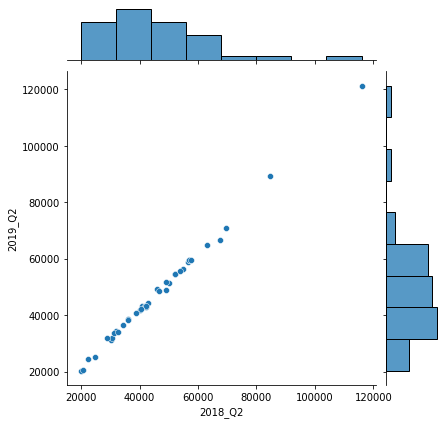

In [31]:
#draw the plot
sns.jointplot(data=df_joint, x="2018_Q2", y="2019_Q2")

**Test for multivariate normality**

https://pingouin-stats.org/generated/pingouin.multivariate_normality.html

In [32]:
X = df_joint[['2018_Q2', '2019_Q2']]
pg.multivariate_normality(X, alpha=.05)

HZResults(hz=1.1871993483467551, pval=0.005417587484060071, normal=False)

**We can't reject multivariate normality, so we will use pearson test for correlations**

https://pingouin-stats.org/generated/pingouin.corr.html#pingouin.corr

In [33]:
x=df_joint['2018_Q2']
y=df_joint['2019_Q2']
pg.corr(x, y, method="pearson").round(3)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,39,0.999,"[1.0, 1.0]",0.997,0.997,0.0,1.642e+44,1.0


#Power Analysis

**Power analysis for T-test**

https://pingouin-stats.org/generated/pingouin.power_ttest.html#pingouin.power_ttest


Note: For a paired T-test, the sample size n corresponds to the number of pairs. For an independent two-sample T-test with equal sample sizes, n corresponds to the sample size of each group (i.e. number of observations in one group).

In [34]:
#install the package
from pingouin import power_ttest

d is the Cohen d effect size, Power is 1-Type II error, Alpha is the type I error

In [35]:
### conduct the test
print('n: %.4f' % power_ttest(d=0.1, power=0.80, alpha=0.05))

n: 1570.7331


**Power analysis for ANOVA**

https://pingouin-stats.org/generated/pingouin.power_anova.html#pingouin.power_anova

In [36]:
# install the package
from pingouin import power_anova

eta is the effect size for ANOVA (the level of correlation across catergories), k is the number of categories, Power is 1-Type II error, alpha is type I error

In [37]:
### conduct the test
print('n: %.4f' % power_anova(eta=0.1, k=3, power=0.80, alpha=0.05))

n: 29.9255


**Power analysis for Chi-square Test**

https://pingouin-stats.org/generated/pingouin.power_chi2.html#pingouin.power_chi2

In [38]:
# install the package
from pingouin import power_chi2

dof is the degress of freedom $=(r-1)*(c-1)$, where r is the number of rows in the expected frequency table and c is the nuber of columns in the expected frequency table. W is the effect size, which is the level of correlation. Power is 1-Type II error and Alpha is the type I error. 

In [39]:
### conduct the test
print('n: %.4f' % power_chi2(dof=1, w=0.3, power=0.80, alpha=0.05))

n: 87.2096
